In [1]:
from MulticriteriaEnsemble import MulticriteriaEnsemble
from tools import dataset
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score,hamming_loss,cohen_kappa_score,jaccard_similarity_score,matthews_corrcoef
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import os
from tools import dataset
import copy
from mauc_gini import*
matplotlib.rcParams['figure.figsize']=[1,1]
%matplotlib inline
metrics = {
    'Accuracy':[make_scorer(accuracy_score),-0.0000000001,1.000000001],
    'Precision(Macro)':[make_scorer(precision_score,average='macro'),-0.0000000001,1.000000001],
    'Recall(Macro)':[make_scorer(recall_score,average='macro'),-0.0000000001,1.000000001],
    'F1':[make_scorer(f1_score,average='macro'),-0.0000000001,1.000000001],
    'Hamming Loss':[make_scorer(hamming_loss,greater_is_better=False),1.000000001,-0.0000000001],
    'Cohen Kappa':[make_scorer(cohen_kappa_score),-0.0000000001,1.000000001],
    'MCC':[make_scorer(matthews_corrcoef),-0.0000000001,1.000000001],
}

In [2]:
krkopt = dataset(path='./datasets/krkopt/',name='krkopt')
krkopt.preprocess(cat=True,cl=True)
krkopt.feat_class_split()
dataset=copy.deepcopy(krkopt)

In [3]:
classes = dataset.y_train.append(dataset.y_test).unique()
num_classes = len(classes)
global_metric = make_scorer(MultiClassNormalizedGini,needs_proba=True,num_classes=num_classes,dt_labels=classes)

In [4]:
me = MulticriteriaEnsemble(dataset=dataset,crit_metrics=metrics,global_metric=global_metric,a=5,delta=0.15,epsilon=0.0013072434145,jenks=False,voting='soft')

In [5]:
me.fit(mtable=True)

Multicriteria table formed!!!


/home/user/newproject/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/newproject/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3> Multicriteria Table </h3>

In [6]:
me.multicriteria_table.sort_values('Ranking')
me.multicriteria_table.to_csv(dataset.path+'results/multicriteria_table.csv')

<h3> Meta Table </h3>

In [7]:
me.meta_table
me.meta_table.to_csv(dataset.path+'results/meta_table.csv')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - No Jenks</h3>

In [8]:
me.score()

0.9800959762307311

<h3>Multicriteria Ensemble(Utility) Model Weights</h3> 

In [9]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_no_jenks.csv')
print df

                              Weight
MLP_krkopt_FOLD3            0.044062
MLP_krkopt_FOLD2            0.043918
MLP_krkopt_FOLD1            0.043542
MLP_krkopt_FOLD0            0.042745
MLP_krkopt_FOLD4            0.043373
KNN_krkopt_FOLD1            0.040137
KNN_krkopt_FOLD0            0.039996
KNN_krkopt_FOLD3            0.040160
KNN_krkopt_FOLD2            0.039856
KNN_krkopt_FOLD4            0.039834
LR_krkopt_FOLD4             0.015971
LR_krkopt_FOLD1             0.016116
LR_krkopt_FOLD0             0.015979
LR_krkopt_FOLD3             0.015769
LR_krkopt_FOLD2             0.015733
Decision_Tree_krkopt_FOLD4  0.044557
Decision_Tree_krkopt_FOLD1  0.044457
Decision_Tree_krkopt_FOLD0  0.044454
Decision_Tree_krkopt_FOLD3  0.044565
Decision_Tree_krkopt_FOLD2  0.044961
SVM_krkopt_FOLD0            0.040609
SVM_krkopt_FOLD1            0.040603
SVM_krkopt_FOLD2            0.040565
SVM_krkopt_FOLD3            0.040582
SVM_krkopt_FOLD4            0.040590
GaussianNB_krkopt_FOLD4     0.015306
G

<h3>Multicriteria Ensemble(Utility) Global Utilities</h3>

In [10]:
df = pd.DataFrame.from_dict(me.utastar_model.global_utilities_post,orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/global_utilities_post.csv')

<h3>Multicriteria Ensemble(Utility) Partial Utilities</h3>

In [11]:
me.utastar_model.marginal_post

OrderedDict([('F1',
              [0.0,
               0.0,
               0.0034170801657517728,
               0.0034170801657517728,
               0.0034170801657517728]),
             ('MCC',
              [0.0,
               0.0,
               0.065078283999034661,
               0.065078283999034661,
               0.065078283999034661]),
             ('Cohen Kappa',
              [0.0,
               0.0,
               0.36405700897236443,
               0.36405700897236443,
               0.36405700897236443]),
             ('Precision(Macro)',
              [0.0,
               0.0,
               0.015509386446483983,
               0.015509386446483983,
               0.015509386446483983]),
             ('Hamming Loss',
              [0.0,
               0.0,
               0.23527629105133505,
               0.23527629105133505,
               0.23527629105133505]),
             ('Recall(Macro)',
              [0.0,
               0.0,
               0.0031789413131882

<h3>Multicriteria Ensemble(Utility) Criteria Weights</h3>

                    Weight
F1                0.003417
MCC               0.065078
Cohen Kappa       0.364057
Precision(Macro)  0.015509
Hamming Loss      0.235276
Recall(Macro)     0.003179
Accuracy          0.313483


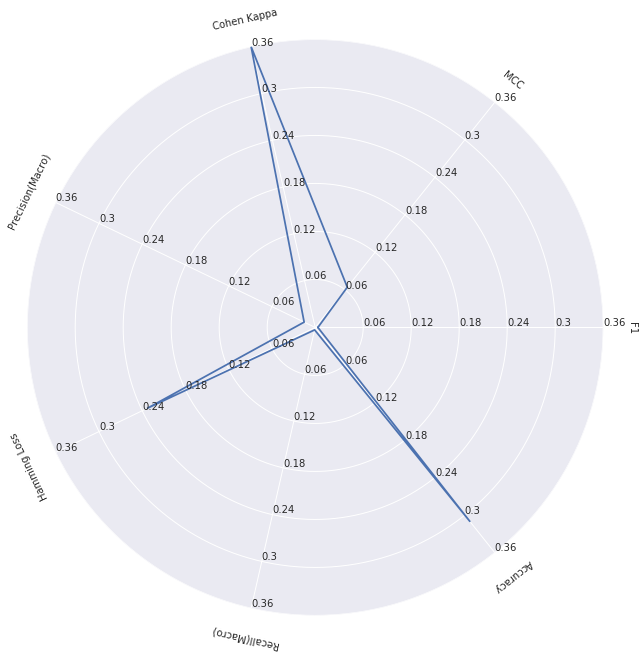

In [12]:
df = pd.DataFrame.from_dict(me.utastar_model.model_weights_post,orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/model_weights_post.csv')
print df
me.plot_criteria_weights()

<h3>Multicriteria Ensemble(Utility) Tau Kendall Post</h3>

In [13]:

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10,10]
me.utastar_model.tau_post

0.55164553915039038

<h3> Global Utilities Chart </h3>

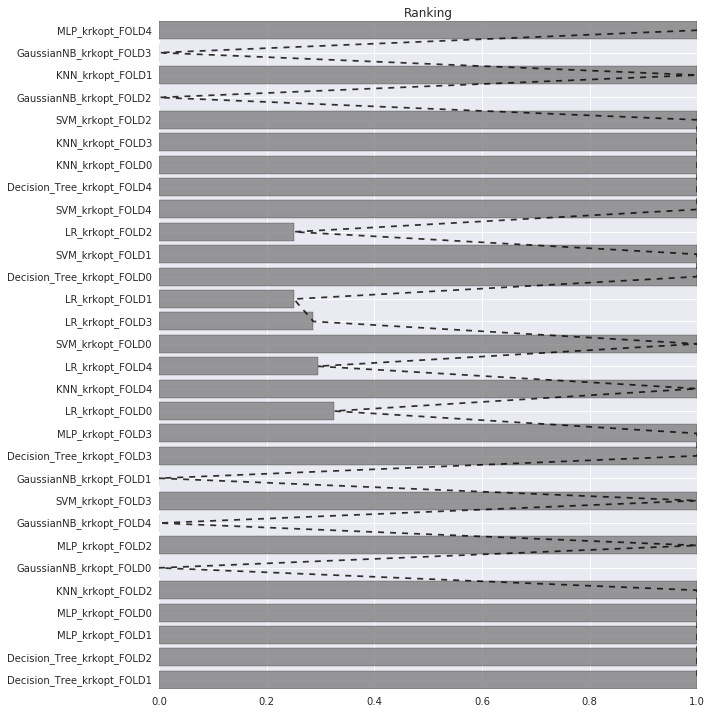

In [14]:
me.plot_global_utilities()

<h3>Predicted Global Utilities</h3>

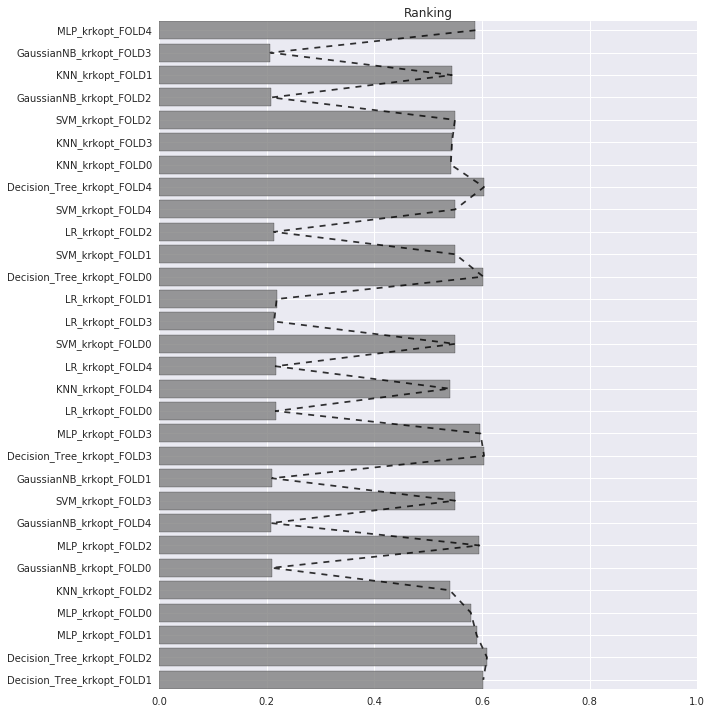

In [15]:
me.plot_global_utilities_pred()

<h3> Partial Utilities Chart </h3>

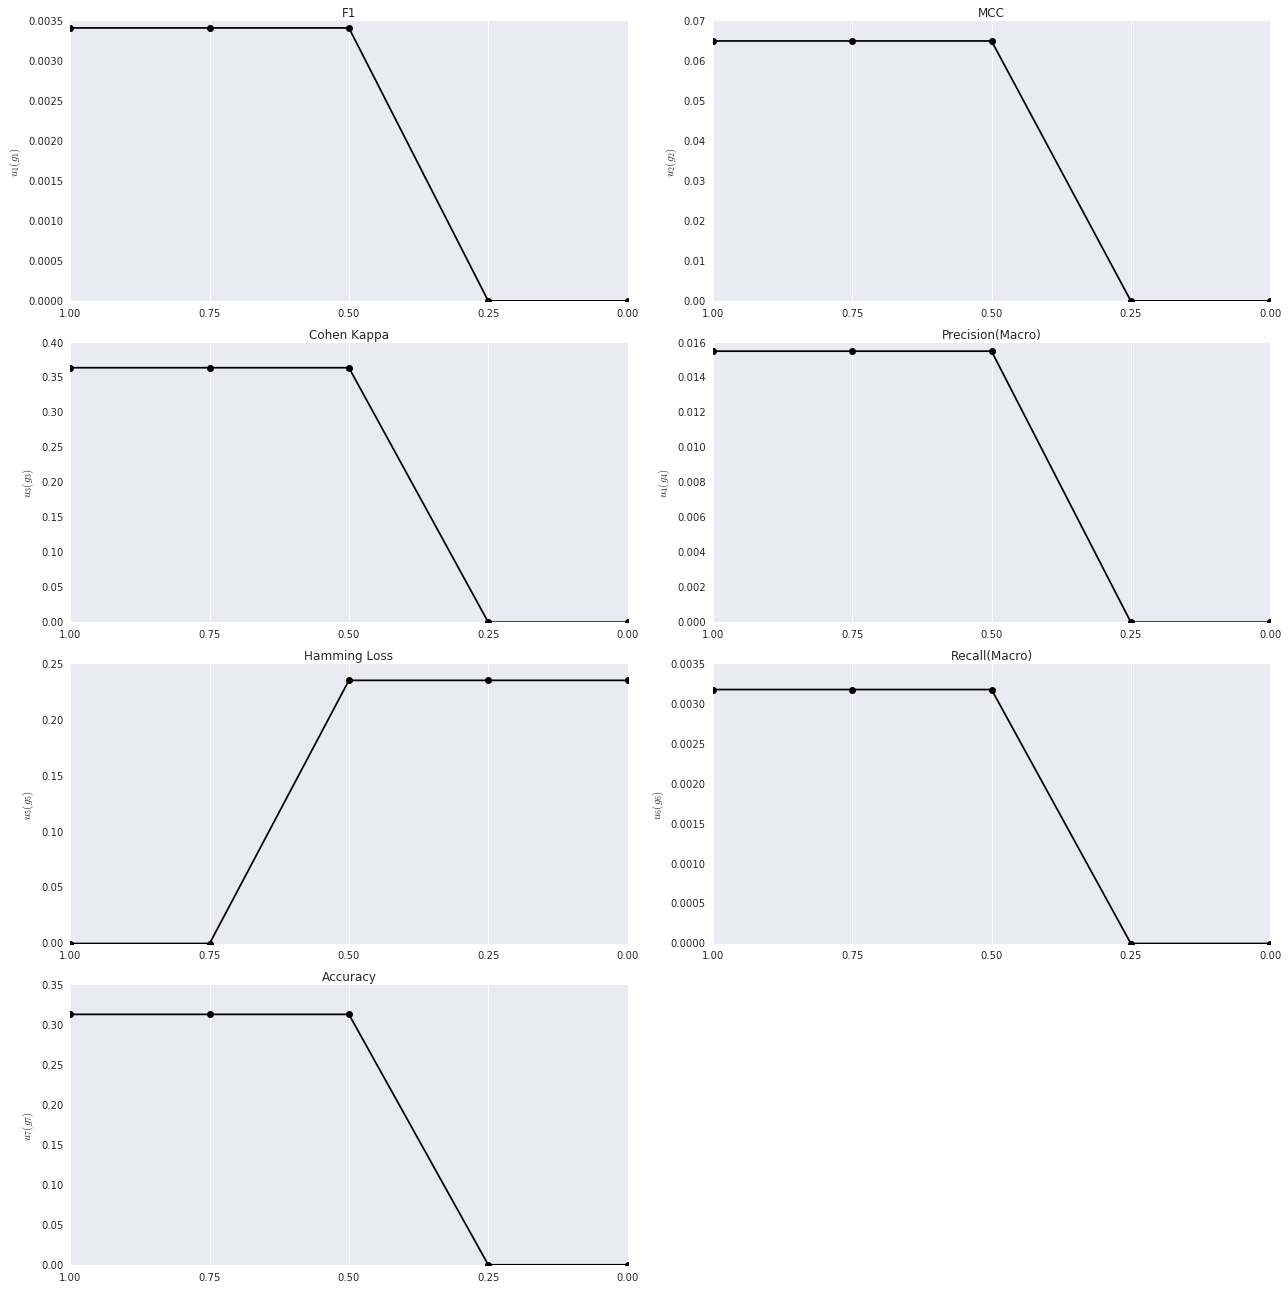

In [16]:
me.plot_partial_utilities()

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Normalized Gini Score on Test Set - No Jenks </h3>

In [17]:
import jenkspy
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
#natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
#metrics = [i if  i > natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.975765680642704

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Model Weights - No Jenks </h3>

                              Weight
MLP_krkopt_FOLD3            0.038267
MLP_krkopt_FOLD2            0.038257
MLP_krkopt_FOLD1            0.038167
MLP_krkopt_FOLD0            0.037929
MLP_krkopt_FOLD4            0.038238
KNN_krkopt_FOLD1            0.036531
KNN_krkopt_FOLD0            0.036680
KNN_krkopt_FOLD3            0.036656
KNN_krkopt_FOLD2            0.036786
KNN_krkopt_FOLD4            0.036511
LR_krkopt_FOLD4             0.032156
LR_krkopt_FOLD1             0.032225
LR_krkopt_FOLD0             0.032137
LR_krkopt_FOLD3             0.032217
LR_krkopt_FOLD2             0.032103
Decision_Tree_krkopt_FOLD4  0.030672
Decision_Tree_krkopt_FOLD1  0.030381
Decision_Tree_krkopt_FOLD0  0.030122
Decision_Tree_krkopt_FOLD3  0.030181
Decision_Tree_krkopt_FOLD2  0.030738
SVM_krkopt_FOLD0            0.037492
SVM_krkopt_FOLD1            0.037497
SVM_krkopt_FOLD2            0.037537
SVM_krkopt_FOLD3            0.037600
SVM_krkopt_FOLD4            0.037568
GaussianNB_krkopt_FOLD4     0.024717
G

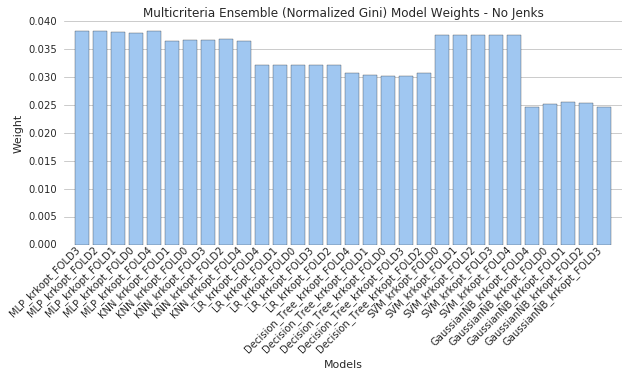

In [18]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_no_jenks.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble (Normalized Gini) Model Weights - No Jenks')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - With Jenks (Default Cluster Limit = 2)</h3>

In [19]:
me.jenks=True
me.fit(mtable=False)
me.score()

0.981946920468129

<h3>Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)</h3>

                              Weight
MLP_krkopt_FOLD3            0.124287
MLP_krkopt_FOLD2            0.123882
MLP_krkopt_FOLD1            0.122821
MLP_krkopt_FOLD0            0.000000
MLP_krkopt_FOLD4            0.000000
KNN_krkopt_FOLD1            0.000000
KNN_krkopt_FOLD0            0.000000
KNN_krkopt_FOLD3            0.000000
KNN_krkopt_FOLD2            0.000000
KNN_krkopt_FOLD4            0.000000
LR_krkopt_FOLD4             0.000000
LR_krkopt_FOLD1             0.000000
LR_krkopt_FOLD0             0.000000
LR_krkopt_FOLD3             0.000000
LR_krkopt_FOLD2             0.000000
Decision_Tree_krkopt_FOLD4  0.125685
Decision_Tree_krkopt_FOLD1  0.125401
Decision_Tree_krkopt_FOLD0  0.125394
Decision_Tree_krkopt_FOLD3  0.125707
Decision_Tree_krkopt_FOLD2  0.126824
SVM_krkopt_FOLD0            0.000000
SVM_krkopt_FOLD1            0.000000
SVM_krkopt_FOLD2            0.000000
SVM_krkopt_FOLD3            0.000000
SVM_krkopt_FOLD4            0.000000
GaussianNB_krkopt_FOLD4     0.000000
G

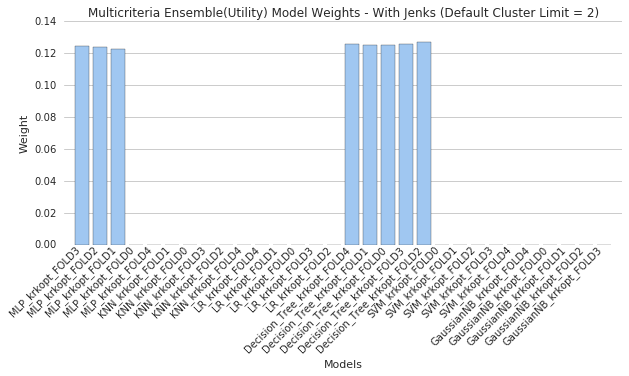

In [20]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l2.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Multicriteria Ensemble Normalized Gini Score: 0.980096
Number of models in the ensemble: 30

                              Weight
MLP_krkopt_FOLD3            0.044062
MLP_krkopt_FOLD2            0.043918
MLP_krkopt_FOLD1            0.043542
MLP_krkopt_FOLD0            0.042745
MLP_krkopt_FOLD4            0.043373
KNN_krkopt_FOLD1            0.040137
KNN_krkopt_FOLD0            0.039996
KNN_krkopt_FOLD3            0.040160
KNN_krkopt_FOLD2            0.039856
KNN_krkopt_FOLD4            0.039834
LR_krkopt_FOLD4             0.015971
LR_krkopt_FOLD1             0.016116
LR_krkopt_FOLD0             0.015979
LR_krkopt_FOLD3             0.015769
LR_krkopt_FOLD2             0.015733
Decision_Tree_krkopt_FOLD4  0.044557
Decision_Tree_krkopt_FOLD1  0.044457
Decision_Tree_krkopt_FOLD0  0.044454
Decision_Tree_krkopt_FOLD3  0.044565
Decision_Tree_krkopt_FOLD2  0.044961
SVM_krkopt_FOLD0            0.040609
SVM_krkopt_FOLD1            0.040603
SVM_krkopt_FOLD2            0.040565
SV

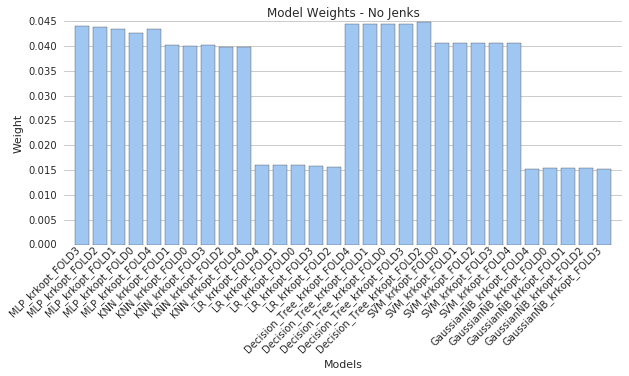

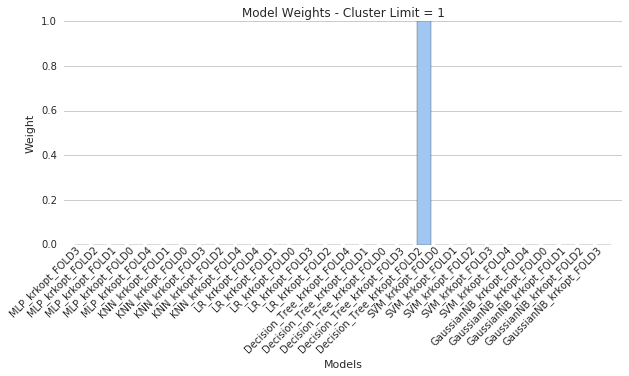

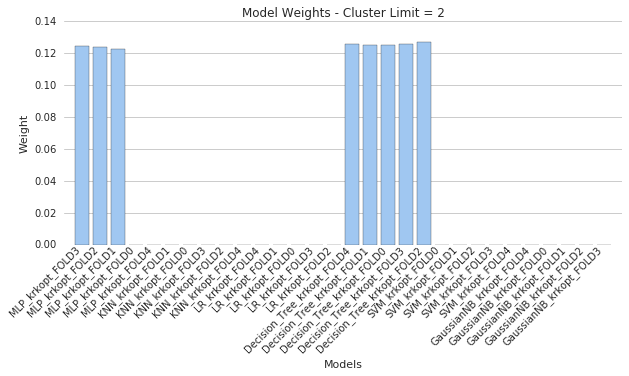

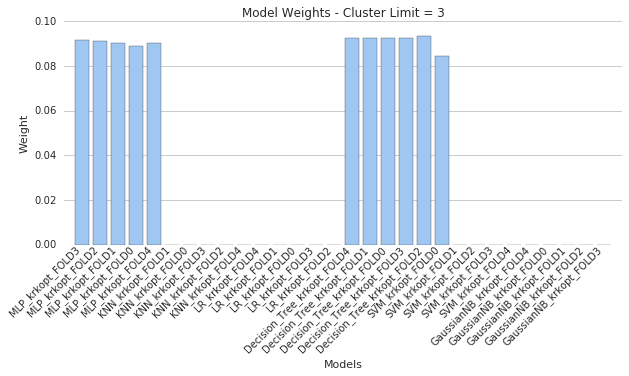

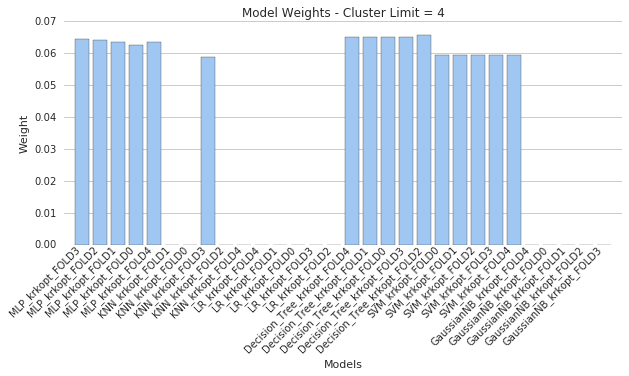

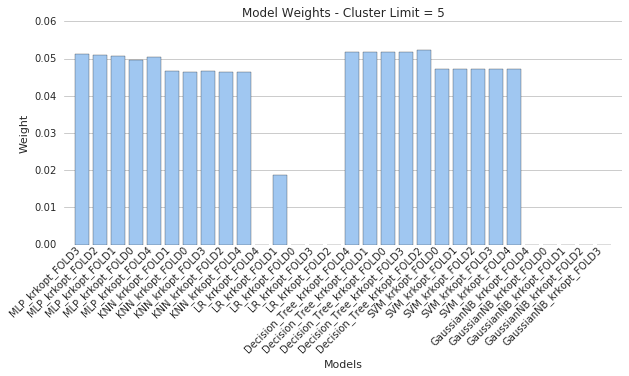

In [21]:
for i in range(0,6,1):
    me.jenks_limit = i
    me.weights = []
    me._get_clfs_weights()
    me._fit_wmv()
    model_counter = 0;
    for j in me.weights:
        if j>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Multicriteria Ensemble Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Utility</h3>

In [22]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/multicriteria_ensemble_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.206849)"
1,"[0.206849,0.218411)"
2,"[0.218411,0.544277)"
3,"[0.544277,0.550366)"
4,"[0.550366,0.590107)"
5,"[0.590107,0.609341)"


<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set - With Jenks</h3>

In [23]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
metrics = [i if  i >= natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9633549670397399

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Model Weights</h3>

                              Weight
MLP_krkopt_FOLD3            0.092135
MLP_krkopt_FOLD2            0.092110
MLP_krkopt_FOLD1            0.091894
MLP_krkopt_FOLD0            0.091320
MLP_krkopt_FOLD4            0.092065
KNN_krkopt_FOLD1            0.000000
KNN_krkopt_FOLD0            0.000000
KNN_krkopt_FOLD3            0.000000
KNN_krkopt_FOLD2            0.088568
KNN_krkopt_FOLD4            0.000000
LR_krkopt_FOLD4             0.000000
LR_krkopt_FOLD1             0.000000
LR_krkopt_FOLD0             0.000000
LR_krkopt_FOLD3             0.000000
LR_krkopt_FOLD2             0.000000
Decision_Tree_krkopt_FOLD4  0.000000
Decision_Tree_krkopt_FOLD1  0.000000
Decision_Tree_krkopt_FOLD0  0.000000
Decision_Tree_krkopt_FOLD3  0.000000
Decision_Tree_krkopt_FOLD2  0.000000
SVM_krkopt_FOLD0            0.090268
SVM_krkopt_FOLD1            0.090282
SVM_krkopt_FOLD2            0.090378
SVM_krkopt_FOLD3            0.090529
SVM_krkopt_FOLD4            0.090451
GaussianNB_krkopt_FOLD4     0.000000
G

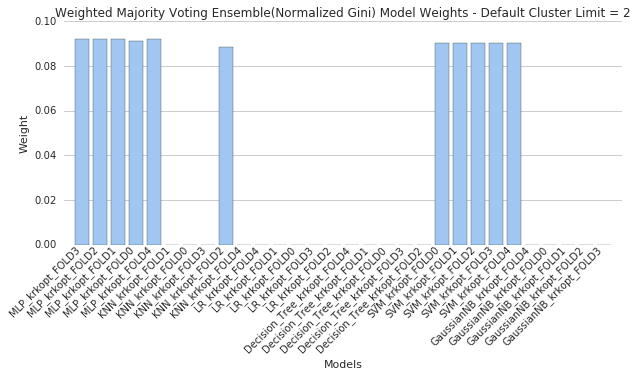

In [24]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l.csv')
print df
me.plot_model_weights(title='Weighted Majority Voting Ensemble(Normalized Gini) Model Weights - Default Cluster Limit = 2')

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: 0.975766
Number of models in the ensemble: 30

                              Weight
MLP_krkopt_FOLD3            0.038267
MLP_krkopt_FOLD2            0.038257
MLP_krkopt_FOLD1            0.038167
MLP_krkopt_FOLD0            0.037929
MLP_krkopt_FOLD4            0.038238
KNN_krkopt_FOLD1            0.036531
KNN_krkopt_FOLD0            0.036680
KNN_krkopt_FOLD3            0.036656
KNN_krkopt_FOLD2            0.036786
KNN_krkopt_FOLD4            0.036511
LR_krkopt_FOLD4             0.032156
LR_krkopt_FOLD1             0.032225
LR_krkopt_FOLD0             0.032137
LR_krkopt_FOLD3             0.032217
LR_krkopt_FOLD2             0.032103
Decision_Tree_krkopt_FOLD4  0.030672
Decision_Tree_krkopt_FOLD1  0.030381
Decision_Tree_krkopt_FOLD0  0.030122
Decision_Tree_krkopt_FOLD3  0.030181
Decision_Tree_krkopt_FOLD2  0.030738
SVM_krkopt_FOLD0            0.037492
SVM_krkopt_FOLD1            0.037497
SVM_krkopt_

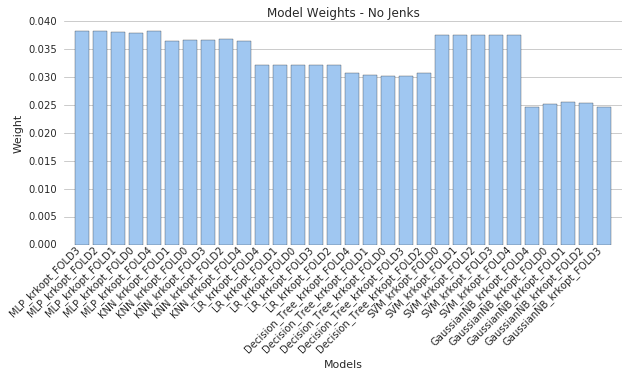

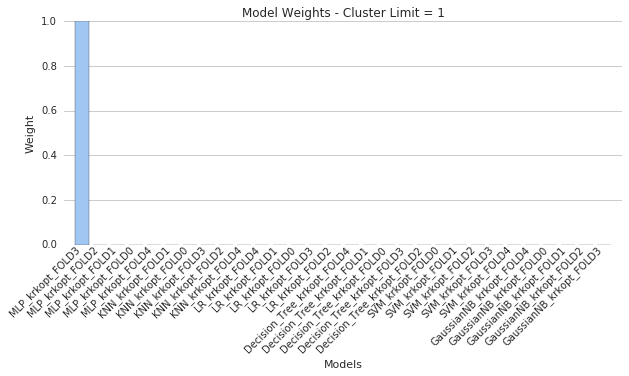

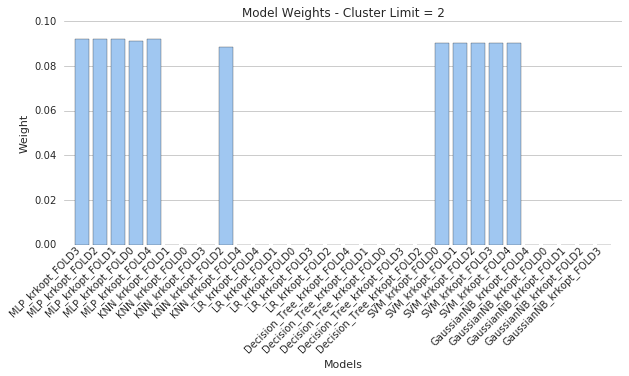

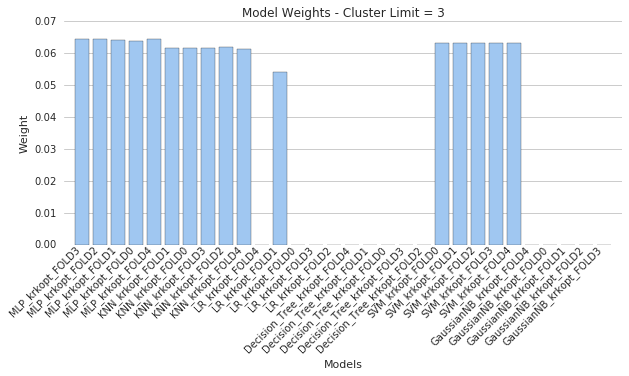

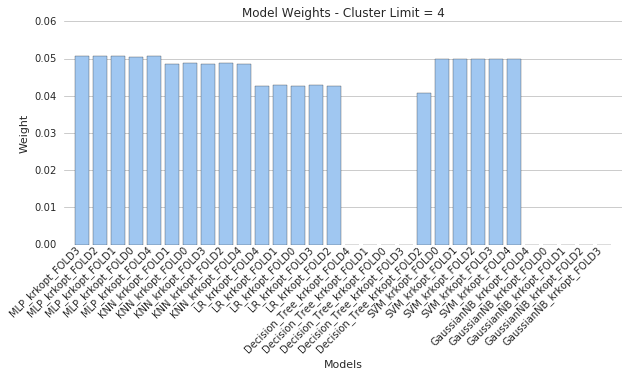

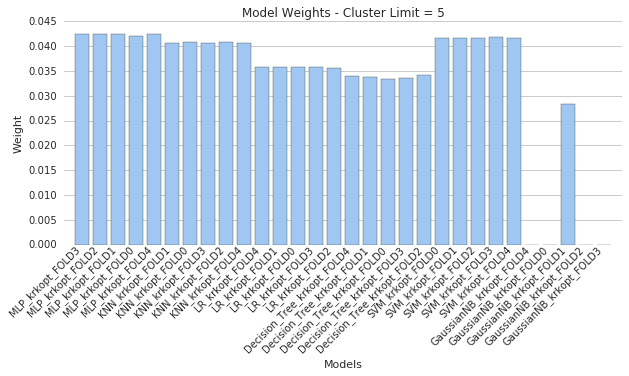

In [25]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
m = metrics
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
for i in range(0,6,1):
    metrics = m
    metrics = [j if  j >= natural_breaks[-i] else 0 for j in metrics]
    metrics_sum = sum(metrics)
    me.weights = []
    for clf in metrics:
        if  clf > 0 :
            me.weights.append(clf/metrics_sum)
        else:
            me.weights.append(0)
    me._fit_wmv()
    model_counter = 0;
    for k in me.weights:
        if k>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Normalized Gini</h3>

In [26]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.206849)"
1,"[0.206849,0.218411)"
2,"[0.218411,0.544277)"
3,"[0.544277,0.550366)"
4,"[0.550366,0.590107)"
5,"[0.590107,0.609341)"


<h3> Weighted Majority Voting Ensemble (Equal Weights, 1/(number_of_models)) </h3>

In [27]:
me.weights = []
for clf in me.bootstrap_models:
    me.weights.append(float(1)/float(len(me.bootstrap_models)))
me.weights
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9746049889002579

<h3>Base Models Normalized Gini Score</h3>

In [28]:
df = pd.DataFrame.from_dict(dict(zip(me.models.keys(),me._get_global_metrics(me.models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_learners_normalized_gini_score.csv')

<h3> Base K-Fold Models Normalized Ginis Score</h3>

In [29]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me._get_global_metrics(me.bootstrap_models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_k_fold_learners_normalized_gini_score.csv')

In [30]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.global_utilities)),orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/multicriteria_ensemble_predicted_global_utilities.csv')
print df

                            Global Utility
MLP_krkopt_FOLD3                  0.597154
MLP_krkopt_FOLD2                  0.595208
MLP_krkopt_FOLD1                  0.590107
MLP_krkopt_FOLD0                  0.579307
MLP_krkopt_FOLD4                  0.587821
KNN_krkopt_FOLD1                  0.543965
KNN_krkopt_FOLD0                  0.542047
KNN_krkopt_FOLD3                  0.544277
KNN_krkopt_FOLD2                  0.540156
KNN_krkopt_FOLD4                  0.539862
LR_krkopt_FOLD4                   0.216449
LR_krkopt_FOLD1                   0.218411
LR_krkopt_FOLD0                   0.216561
LR_krkopt_FOLD3                   0.213709
LR_krkopt_FOLD2                   0.213228
Decision_Tree_krkopt_FOLD4        0.603869
Decision_Tree_krkopt_FOLD1        0.602505
Decision_Tree_krkopt_FOLD0        0.602470
Decision_Tree_krkopt_FOLD3        0.603978
Decision_Tree_krkopt_FOLD2        0.609341
SVM_krkopt_FOLD0                  0.550366
SVM_krkopt_FOLD1                  0.550277
SVM_krkopt_

In [31]:
me.multicriteria_table.sort_values('Ranking').to_csv('./statlog_me_table.csv')

In [ ]:
dataset.path+'results/'